# M2 Example using gridded data

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter

import cmocean
#print(cmocean.cm.cmapnames)

In [2]:
from erddapy.erddapy import ERDDAP

In [3]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'
dataset = '1hr_gridded_datasets_Mooring_18bsm2a_final'

e = ERDDAP(server=server_url)

e.constraints = None
e.protocol = 'griddap'

opendap_url = e.get_download_url(
    dataset_id=dataset,
    response='opendap',
)

print(opendap_url)

http://akutan.pmel.noaa.gov:8080/erddap/griddap/1hr_gridded_datasets_Mooring_18bsm2a_final


In [4]:
from netCDF4 import Dataset

with Dataset(opendap_url) as nc:
    print(nc.summary)

QC'd (final) mooring data from 18BSM2A.  This dataset has been gridded to 1hr resolution (with pressure left at discrete depths).  It uses only datasets from the associated erddap tabular datasets_Mooring_18bsm2a_final.  A depth field exisists for each known instrument depth, even if the parameter wasn't measured at that depth.


In [5]:
e.dataset_id=dataset
e.response = 'nc'
ds = e.to_xarray(decode_times=True)

/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

In [6]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

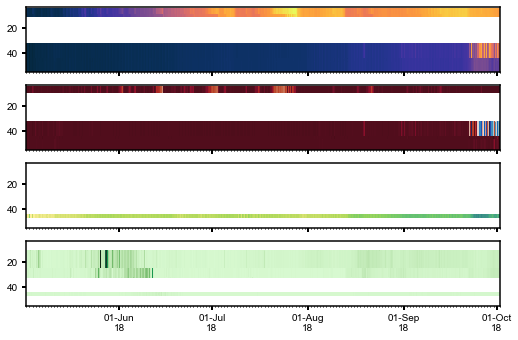

In [7]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8.5,5.5))

ax1.pcolormesh(ds.time,ds.depth,ds.temperature,
                     cmap=cmocean.cm.thermal)
ax2.pcolormesh(ds.time,ds.depth,ds.temperature.diff(dim='depth'),
                     cmap=cmocean.cm.balance)
ax3.pcolormesh(ds.time,ds.depth,ds.salinity,
                     cmap=cmocean.cm.haline)
ax4.pcolormesh(ds.time,ds.depth,ds.Chlorophyll_Fluorescence,
                     cmap=cmocean.cm.algae)


ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(MonthLocator())
ax4.xaxis.set_minor_locator(DayLocator())


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
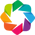

:QuadMesh   [time,depth]   (temperature)

In [8]:
import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

hv_ds = hv.Dataset(ds['temperature'])[:,:]

data = hv_ds.to(hv.QuadMesh,kdims=["time", "depth"]).options(**dict(invert_yaxis=True))
data

In [9]:
ds.longitude.max()

<xarray.DataArray 'longitude' ()>
array(195.93449402)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


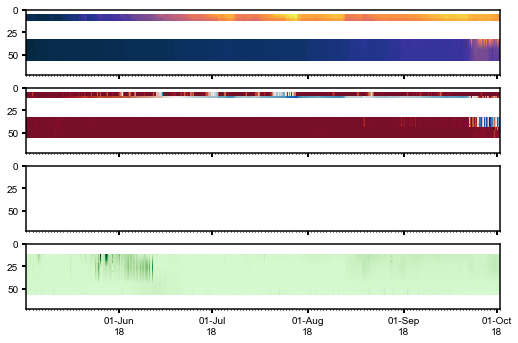

In [10]:
### interp test

newdepth = np.linspace(0, 72,73)

filled = ds.interpolate_na(dim='depth',limit=1)
dsi = filled.interp(depth=newdepth)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8.5,5.5))

ax1.pcolormesh(dsi.time,dsi.depth,dsi.temperature,
                     cmap=cmocean.cm.thermal)
ax2.pcolormesh(dsi.time,dsi.depth,dsi.temperature.diff(dim='depth'),
                     cmap=cmocean.cm.balance)
ax3.pcolormesh(dsi.time,dsi.depth,dsi.salinity,
                     cmap=cmocean.cm.haline)
ax4.pcolormesh(dsi.time,dsi.depth,dsi.Chlorophyll_Fluorescence,
                     cmap=cmocean.cm.algae)


ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(MonthLocator())
ax4.xaxis.set_minor_locator(DayLocator())


In [11]:
### loop over all M2 datasets

e = ERDDAP(server=server_url)
df = pd.read_csv(e.get_search_url(response='csv', search_for='1hr_'))
print(df['Dataset ID'].values)

['1hr_gridded_datasets_Mooring_00bs4s_final'
 '1hr_gridded_datasets_Mooring_00bs4w_final'
 '1hr_gridded_datasets_Mooring_00bsm2a_final'
 '1hr_gridded_datasets_Mooring_00bsp2s_final'
 '1hr_gridded_datasets_Mooring_00bsp2w_final'
 '1hr_gridded_datasets_Mooring_00bsp3s_final'
 '1hr_gridded_datasets_Mooring_00cb1a_final'
 '1hr_gridded_datasets_Mooring_00kc1a_final'
 '1hr_gridded_datasets_Mooring_00kc2a_final'
 '1hr_gridded_datasets_Mooring_00pa1a_final'
 '1hr_gridded_datasets_Mooring_01bs2c_final'
 '1hr_gridded_datasets_Mooring_01bs4a_final'
 '1hr_gridded_datasets_Mooring_01bs4b_final'
 '1hr_gridded_datasets_Mooring_01bsm2a_final'
 '1hr_gridded_datasets_Mooring_01gbm3a_final'
 '1hr_gridded_datasets_Mooring_01gbm3b_final'
 '1hr_gridded_datasets_Mooring_02bs2c_final'
 '1hr_gridded_datasets_Mooring_02bs4a_final'
 '1hr_gridded_datasets_Mooring_02bs4b_final'
 '1hr_gridded_datasets_Mooring_02bsm2a_final'
 '1hr_gridded_datasets_Mooring_03bs2a_final'
 '1hr_gridded_datasets_Mooring_03bs2c_final'
 '

1hr_gridded_datasets_Mooring_00bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_01bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_01bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_02bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_02bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_03bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_03bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_04bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_04bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_05bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_05bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_06bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_06bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_07bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_07bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_08bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_08bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_09bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_09bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_10bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_10bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_11bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_11bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_12bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_12bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_13bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_13bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_14bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_14bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_15bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_15bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_16bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_16bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_17bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_17bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_18bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_18bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_19bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

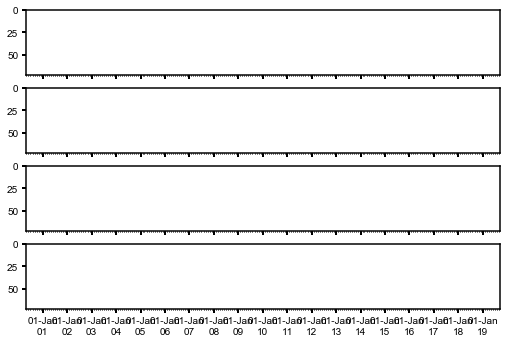

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8.5,5.5))

for dataset_id in df['Dataset ID'].values:
    if ('m2a' in dataset_id) or ('bs2c' in dataset_id):
        print(dataset_id)
        
        e.protocol = 'griddap'
        e.dataset_id=dataset_id
        e.response = 'nc'
        ds = e.to_xarray(decode_times=True)
        
        newdepth = np.linspace(0, 72,73)

        try:
            filled = ds.interpolate_na(dim='depth',limit=2)
            dsi = filled.interp(depth=newdepth)

            ax1.pcolormesh(dsi.time,dsi.depth,dsi.temperature,
                           vmin=-2,vmax=14,
                           cmap=cmocean.cm.thermal)
            ax2.pcolormesh(dsi.time,dsi.depth,dsi.temperature.diff(dim='depth'),
                           vmin=-5,vmax=5,
                           cmap=cmocean.cm.balance)
            ax3.pcolormesh(dsi.time,dsi.depth,dsi.salinity,
                           vmin=31,vmax=32,
                           cmap=cmocean.cm.haline)
            ax4.pcolormesh(dsi.time,dsi.depth,dsi.Chlorophyll_Fluorescence,
                           vmin=0,vmax=20,
                           cmap=cmocean.cm.algae)
        except:
            continue

ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(YearLocator())
ax4.xaxis.set_minor_locator(MonthLocator())



1hr_gridded_datasets_Mooring_00bsm2a_final
1hr_gridded_datasets_Mooring_01bs2c_final
1hr_gridded_datasets_Mooring_01bsm2a_final
1hr_gridded_datasets_Mooring_02bs2c_final
1hr_gridded_datasets_Mooring_02bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_03bs2c_final
1hr_gridded_datasets_Mooring_03bsm2a_final
1hr_gridded_datasets_Mooring_04bs2c_final
1hr_gridded_datasets_Mooring_04bsm2a_final
1hr_gridded_datasets_Mooring_05bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_05bsm2a_final
1hr_gridded_datasets_Mooring_06bs2c_final
1hr_gridded_datasets_Mooring_06bsm2a_final
1hr_gridded_datasets_Mooring_07bs2c_final
1hr_gridded_datasets_Mooring_07bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_08bs2c_final
1hr_gridded_datasets_Mooring_08bsm2a_final
1hr_gridded_datasets_Mooring_09bs2c_final
1hr_gridded_datasets_Mooring_09bsm2a_final
1hr_gridded_datasets_Mooring_10bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_10bsm2a_final
1hr_gridded_datasets_Mooring_11bs2c_final
1hr_gridded_datasets_Mooring_11bsm2a_final
1hr_gridded_datasets_Mooring_12bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_12bsm2a_final
1hr_gridded_datasets_Mooring_13bs2c_final
1hr_gridded_datasets_Mooring_13bsm2a_final
1hr_gridded_datasets_Mooring_14bs2c_final
1hr_gridded_datasets_Mooring_14bsm2a_final
1hr_gridded_datasets_Mooring_15bs2c_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_15bsm2a_final
1hr_gridded_datasets_Mooring_16bs2c_final
1hr_gridded_datasets_Mooring_16bsm2a_final
1hr_gridded_datasets_Mooring_17bs2c_final
1hr_gridded_datasets_Mooring_17bsm2a_final


/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/holoviz/lib/py

1hr_gridded_datasets_Mooring_18bs2c_final
1hr_gridded_datasets_Mooring_18bsm2a_final
1hr_gridded_datasets_Mooring_19bsm2a_final


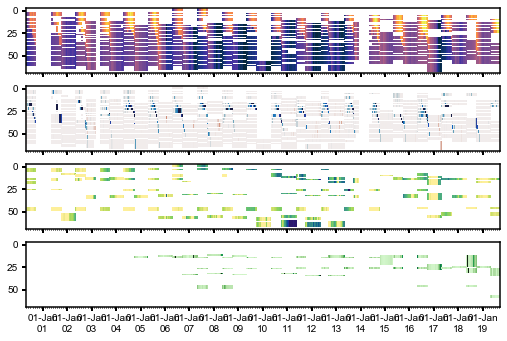

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8.5,5.5))

for dataset_id in df['Dataset ID'].values:
    if ('m2a' in dataset_id) or ('bs2c' in dataset_id):
        print(dataset_id)
        
        e.protocol = 'griddap'
        e.dataset_id=dataset_id
        e.response = 'nc'
        ds = e.to_xarray(decode_times=True)
        

        ax1.pcolormesh(ds.time,ds.depth,ds.temperature,
                       vmin=-2,vmax=14,
                       cmap=cmocean.cm.thermal)
        ax2.pcolormesh(ds.time,ds.depth,ds.temperature.diff(dim='depth'),
                       vmin=-5,vmax=5,
                       cmap=cmocean.cm.balance)
        ax3.pcolormesh(ds.time,ds.depth,ds.salinity,
                       vmin=31,vmax=32,
                       cmap=cmocean.cm.haline)
        ax4.pcolormesh(ds.time,ds.depth,ds.Chlorophyll_Fluorescence,
                       vmin=0,vmax=20,
                       cmap=cmocean.cm.algae)


ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(YearLocator())
ax4.xaxis.set_minor_locator(MonthLocator())

